In [1]:
import pprint
import numpy as np
import math
import copy
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

# Introduction

The goal in this section is to create a Python class that simulates the propagation of disease spread in a closed system. This system begins with a size of $N$ people with $n$ of them being infected on day-0. Given a probability of infection, we can analyze how the disease propagates on a daily basis through $D$ number of days.

Three simplifying assumptions are made:
1. The system is closed. A person can only get infected via contact from another person in the system. 
2. A person becomes infected on day-0, and becomes infectious for 3 days therafter. The person is also not contagious on day-0. For example, if a person becomes sick on day-5, they are contagious and remain sick on days day-6, day-7, and day-8. On day-9 and beyond, their status changes to "recovered" and remain immune. 
3. Everyone comes into contact with everyone else. 

## Data Structures
The disease object creates, maintains, and updates four dictionaries. Their names and general formats are as follows:
1. infected = {day-d: [$x_{i}$]}, where $d=0,1,...,D$ and $i=1,2,...,N_{infected}$.

2. non_sick = {day-d: [$x_{h}$]}, where $d=0,1,...,D$ and $h=1,2,...,N_{non\_sick}$.

3. sick_count = {day-d: $c_{d}$}, where $d=0,1,...,D$ and $c$ is the infection counts.

4. sys_state = {day-d: {status: $s_{d}$, days: $q_{d}$}}, where $d=0,1,...,D$, $s_{d}=\{recovered, non\_sick, infected\}$, and $q_{d}$ is the number of sick days.

## Programmatic Logic
##### \__init\__
Given the total number of people ($N$), the number of infected on day-0 ($n$), and the probability of infection ($p$), the disease object initializes a system state and randomly chooses the $n$ individuals who are infected on day-0.

##### Update
The update method takes a desired day of the system state for updating. It then produces a state for all the variables for the next day. To do this, it takes the desired day and looks for any who are infected. If their number of sick days is >= 3, their status is changed to recovered. If they are infected and the number of days is < 3, then the number is incremented up by 1.

##### Expose 
The expose method takes a a desired day of the system state to expose all individuals to all others. For each person with a non_sick status, a random number is generated with a uniform(0,1) distribution. If the number is less than $p$, the probability of infection, the person's status is changed to infected. This rng process is repeated for the number of infected people who were infected prior to this iterating process.

##### Propagate
The propagate method takes $D$ days as an argument and updates and exposes the system state for $D$ number of days.

In [2]:
class disease:
    def __init__(self, N, n, p):
        self.sys_state = {"day-0": {}}
        self.N = N
        self.n = n
        self.p = p
        self.infected = {"day-0": []}
        self.non_sick = {"day-0": []}
        self.sick_count = {"day-0": self.n}
        
        for i in range(1, self.N+1):
            self.sys_state["day-0"][f"x{i}"] = {"status": "non-infected", "days": 0}
            self.non_sick["day-0"].append(f"x{i}")
            
        for i in range(0, self.n):
            repeater = True
            while repeater == True:
                rand_int = np.random.randint(low=1, high=self.N+1)
                if self.sys_state["day-0"][f"x{rand_int}"]["status"] != "infected":
                    self.sys_state["day-0"][f"x{rand_int}"]["status"] = "infected"
                    self.infected["day-0"].append(f"x{rand_int}")
                    self.non_sick["day-0"].remove(f"x{rand_int}")
                    repeater = False
                    
        
                    
    def update(self, N, sys_state, day="day-0"):
        infected = []
        non_sick = []
        update_state = copy.deepcopy(sys_state)[day]
        for i in range(1, N+1):
            xi = f"x{i}"
            if update_state[xi]["status"] == "infected":
                if update_state[xi]["days"] >= 3:
                    update_state[xi]["status"] = "recovered"
                    non_sick.append(xi)
                    
                else:
                    update_state[xi]["days"] += 1
                    infected.append(xi)
                    
            else:
                non_sick.append(xi)
        
        return update_state, infected, non_sick
    
    def expose(self, sys_state, infected, non_sick, p, day="day-0"):
        sick_count = len(infected)
        expose_state = copy.deepcopy(sys_state)[day]
        
        for xi in expose_state:
            if expose_state[xi]["status"] == "non-infected":
                rng = np.random.uniform(0.0, 1.0, sick_count)
                if rng.size > 0:
                    if min(rng) <= p:
                        expose_state[xi]["status"] = "infected"
                        infected.append(xi)
                        non_sick.remove(xi)
                        
        sick_count = len(infected)
        
        return expose_state, infected, non_sick
    
    def propagate(self, days):
        temp_state = copy.deepcopy(self.sys_state) 
    
        for d in range(1, days+1):
            day = f"day-{d}"
            temp_state[day] = temp_state[f"day-{d-1}"]
            temp_state[day], infected, non_sick = self.update(self.N, temp_state, day)
            
            temp_state[day], infected, non_sick = self.expose(temp_state, infected, non_sick, self.p, day) 
            
            self.infected[day] = infected
            self.non_sick[day] = non_sick
            self.sick_count[day] = len(infected)
        
        self.sys_state = temp_state
        

# Example of the propagation 

## Sample demo showing the final system state

In [3]:
N = 50
n = 1
p = 0.04
D = 5
model = disease(N, n, p)
model.propagate(D)
model.sys_state

{'day-0': {'x1': {'status': 'non-infected', 'days': 0},
  'x2': {'status': 'non-infected', 'days': 0},
  'x3': {'status': 'non-infected', 'days': 0},
  'x4': {'status': 'non-infected', 'days': 0},
  'x5': {'status': 'non-infected', 'days': 0},
  'x6': {'status': 'non-infected', 'days': 0},
  'x7': {'status': 'non-infected', 'days': 0},
  'x8': {'status': 'non-infected', 'days': 0},
  'x9': {'status': 'non-infected', 'days': 0},
  'x10': {'status': 'non-infected', 'days': 0},
  'x11': {'status': 'non-infected', 'days': 0},
  'x12': {'status': 'non-infected', 'days': 0},
  'x13': {'status': 'non-infected', 'days': 0},
  'x14': {'status': 'non-infected', 'days': 0},
  'x15': {'status': 'non-infected', 'days': 0},
  'x16': {'status': 'non-infected', 'days': 0},
  'x17': {'status': 'non-infected', 'days': 0},
  'x18': {'status': 'non-infected', 'days': 0},
  'x19': {'status': 'non-infected', 'days': 0},
  'x20': {'status': 'non-infected', 'days': 0},
  'x21': {'status': 'non-infected', 'day

## Infected data structure

In [4]:
model.infected

{'day-0': ['x36'],
 'day-1': ['x36'],
 'day-2': ['x36', 'x5'],
 'day-3': ['x5', 'x36', 'x9', 'x12', 'x20', 'x21', 'x29', 'x38', 'x45'],
 'day-4': ['x5',
  'x9',
  'x12',
  'x20',
  'x21',
  'x29',
  'x38',
  'x45',
  'x1',
  'x4',
  'x6',
  'x10',
  'x14',
  'x17',
  'x19',
  'x25',
  'x46',
  'x49'],
 'day-5': ['x1',
  'x4',
  'x5',
  'x6',
  'x9',
  'x10',
  'x12',
  'x14',
  'x17',
  'x19',
  'x20',
  'x21',
  'x25',
  'x29',
  'x38',
  'x45',
  'x46',
  'x49',
  'x2',
  'x3',
  'x13',
  'x16',
  'x18',
  'x23',
  'x26',
  'x32',
  'x35',
  'x37',
  'x40',
  'x42',
  'x48']}

## Non_sick data structure

In [5]:
model.non_sick

{'day-0': ['x1',
  'x2',
  'x3',
  'x4',
  'x5',
  'x6',
  'x7',
  'x8',
  'x9',
  'x10',
  'x11',
  'x12',
  'x13',
  'x14',
  'x15',
  'x16',
  'x17',
  'x18',
  'x19',
  'x20',
  'x21',
  'x22',
  'x23',
  'x24',
  'x25',
  'x26',
  'x27',
  'x28',
  'x29',
  'x30',
  'x31',
  'x32',
  'x33',
  'x34',
  'x35',
  'x37',
  'x38',
  'x39',
  'x40',
  'x41',
  'x42',
  'x43',
  'x44',
  'x45',
  'x46',
  'x47',
  'x48',
  'x49',
  'x50'],
 'day-1': ['x1',
  'x2',
  'x3',
  'x4',
  'x5',
  'x6',
  'x7',
  'x8',
  'x9',
  'x10',
  'x11',
  'x12',
  'x13',
  'x14',
  'x15',
  'x16',
  'x17',
  'x18',
  'x19',
  'x20',
  'x21',
  'x22',
  'x23',
  'x24',
  'x25',
  'x26',
  'x27',
  'x28',
  'x29',
  'x30',
  'x31',
  'x32',
  'x33',
  'x34',
  'x35',
  'x37',
  'x38',
  'x39',
  'x40',
  'x41',
  'x42',
  'x43',
  'x44',
  'x45',
  'x46',
  'x47',
  'x48',
  'x49',
  'x50'],
 'day-2': ['x1',
  'x2',
  'x3',
  'x4',
  'x6',
  'x7',
  'x8',
  'x9',
  'x10',
  'x11',
  'x12',
  'x13',
  'x14'

## Sick_count data structure

In [6]:
model.sick_count

{'day-0': 1, 'day-1': 1, 'day-2': 2, 'day-3': 9, 'day-4': 18, 'day-5': 31}

# Validating the binomial distribution

The simplifying assumptions of the simulation model allows the system to follow a binomial distribution. For example, the system follows a $Binomial(N-n, p)$ distribution for day 1. Theoretically, this implies that the expected value of number of infections is $E=(N-n)p$

If $N=50$, $n=1$, $p=0.04$, we would then expect an average of 1.96 new infections on day-1.

The following code block creates a function that cycles through a specified number of iterations. In each iteration, a new simulation is run for 1 day and the number of new infections is recorded for each run. We can then take the average and compare to the theoretical expectation.

In [7]:
def validate_binomial(N, n, p, iterations):
    num_successes = []
    for i in range(iterations):
        num_sick = 0
        model = disease(N, n, p)
        model.propagate(1)
        state = model.sys_state["day-1"]
        for xi in state:
            if state[xi]["status"] == "infected" and state[xi]["days"] == 0:
                num_sick += 1
        num_successes.append(num_sick)
        
    return num_successes

In [8]:
validate_bin = validate_binomial(N, n, p, 5000)
statistics.mean(validate_bin)

1.978

The average number of successes is approximately 1.96 after 5000 iterations. This says that our simulation is running reasonably for the first day.

## What about day-2, day-3, etc?
Unfortunately, the theoretical expected infected numbers for subsequent days are a bit less straightforward in computing. Let's walk through what we would expect on day-2. To do so, recall that assumption \#3 states that everyone comes into contact with everyone else. This means that if $x_{1}$ and $x_{2}$ are sick and $x_{3}$ is not, $x_{3}$ has two chances to become infected.

In our current system state, we have shown that an expected 1.96 new infections on day 1, resulting in $1.96+1=2.96$ total infected. This leaves $50-2.96=47.04$ non_sick. After these 47.04 people are exposed to the first infected person, an expected $47.04(0.04)=1.8816$ of them become infected, leaving 45.1584 non_sick left. These remainders flip the coin again on the next sick person. Then the remaining non_sick of that iteration then gets exposed to the final 0.96 person.

The full calculation is as follows:
$$numsick_{day2} = 2.96 + (47.04)(.04) + (45.1584)(0.04) + (43.352064)(0.04)(0.96) \approx 8.613$$

Let's now simulate the system through 2500 iterations to see what the average number of the infected are each day. We can compare the day-2 average to our calculation above to further assess the validity of the simulation model.

In [9]:
def infect_per_day(N, n, p, days, iterations):
    counts = {}
    for d in range(0, days+1):
        day_d = f"day-{d}"
        counts[day_d] = []
        
    for i in range(1, iterations+1):
        model = disease(N, n, p)
        model.propagate(days)
        sick_count = model.sick_count
        
        for k, v in sick_count.items():
            counts[k].append(v)
    
    mean_counts = {}
    for d in range(0, days+1):
        day_d = f"day-{d}"
        mean_counts[day_d] = statistics.mean(counts[day_d])
        
    return mean_counts
    
    

In [10]:
N=50
n=1
p=0.04
D=50
mean_infections = infect_per_day(N, n, p, D, 2500)
print(mean_infections)

{'day-0': 1, 'day-1': 2.9716, 'day-2': 8.2196, 'day-3': 19.194, 'day-4': 32.2128, 'day-5': 40.4892, 'day-6': 39.7636, 'day-7': 30.126, 'day-8': 16.4324, 'day-9': 6.2636, 'day-10': 1.758, 'day-11': 0.426, 'day-12': 0.1016, 'day-13': 0.0224, 'day-14': 0.0056, 'day-15': 0.0008, 'day-16': 0, 'day-17': 0, 'day-18': 0, 'day-19': 0, 'day-20': 0, 'day-21': 0, 'day-22': 0, 'day-23': 0, 'day-24': 0, 'day-25': 0, 'day-26': 0, 'day-27': 0, 'day-28': 0, 'day-29': 0, 'day-30': 0, 'day-31': 0, 'day-32': 0, 'day-33': 0, 'day-34': 0, 'day-35': 0, 'day-36': 0, 'day-37': 0, 'day-38': 0, 'day-39': 0, 'day-40': 0, 'day-41': 0, 'day-42': 0, 'day-43': 0, 'day-44': 0, 'day-45': 0, 'day-46': 0, 'day-47': 0, 'day-48': 0, 'day-49': 0, 'day-50': 0}


The average sick counts in day-1 and day-2 remain reasonably consistent with expectations. We would expect a more precise convergence with higher iterations.

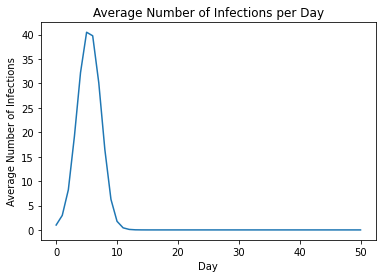

In [11]:
days = []
infections = []
i=0.0
for day, num_infect in mean_infections.items():
    days.append(i)
    infections.append(num_infect)
    i+=1.0

sns.lineplot(data=infections)   
plt.xlabel("Day")
plt.ylabel("Average Number of Infections")
plt.title("Average Number of Infections per Day")
plt.show()

# When does the epidemic end?

Here, we seek to evaluate when we might expect the epidemic to end. To do so, we run our model through 30 days for 2500 iterations. In each iteration, we record the first day such that no one is infected (end of epidemic).  

In [12]:
def end_of_epidemic(N, n, p, days, iterations):
    state = {}
    for d in range(0, days+1):
        day_d = f"day-{d}"
        state[day_d] = [0] * iterations
    
    for i in range(0, iterations):
        model = disease(N, n, p)
        model.propagate(days)
        sick_count = model.sick_count
        
        for d in range(0, days+1):
            day_d = f"day-{d}"
            if sick_count[day_d] == 0:
                state[day_d][i] = 1
                break
    
    end_counts = []            
    for d in range(0, days+1):
        day_d = f"day-{d}"
        end_counts.append(sum(state[day_d]))
        
        
    return end_counts
            
    

In [13]:
end_epid_counts = end_of_epidemic(N, n, p, D, 2500)
print(end_epid_counts)

[0, 0, 0, 0, 5, 1, 0, 0, 5, 253, 881, 833, 364, 111, 35, 9, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


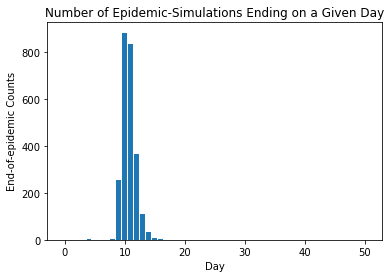

In [15]:
plt.bar(height=end_epid_counts, x=[i for i in range(0, len(end_epid_counts))])
plt.xlabel("Day")
plt.ylabel("End-of-epidemic Counts")
plt.title("Number of Epidemic-Simulations Ending on a Given Day")
plt.show()

In [30]:
ratio_epid_end = sum(end_epid_counts[0:13]) / sum(end_epid_counts)
print(f"{round(ratio_epid_end*100, 2)}% of the epidemic simulations end within 13 days given the initialization parameters.")

93.68% of the epidemic simulations end within 13 days given the initialization parameters.
